In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [29]:
data = pd.read_csv("D:\Data Science and Machine learning\c21e73a1bd1700294ef790c56c8aec1f-819b69b5736821ccee93d05b51de0510bea00294\diabetes.csv")

In [30]:
data.head(10)

,num_pregnant,plasma_glucose,diastolic_bp_mmHg,triceps_skinfold_mm,serum_insulin,body_mass,diabetes_pedigree,age_years,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


**Columns info**:
1. Number of times pregnant
2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test
3. Diastolic blood pressure (mm Hg)
4. Triceps skin fold thickness (mm)
5. 2-Hour serum insulin (mu U/ml)
6. Body mass index (weight in kg/(height in m)^2)
7. Diabetes pedigree function
8. Age (years)
9. Class variable (0 or 1)

#### Exploring the columns present in the dataset

In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   num_pregnant         768 non-null    int64  
 1   plasma_glucose       768 non-null    int64  
 2   diastolic_bp_mmHg    768 non-null    int64  
 3   triceps_skinfold_mm  768 non-null    int64  
 4   serum_insulin        768 non-null    int64  
 5   body_mass            768 non-null    float64
 6   diabetes_pedigree    768 non-null    float64
 7   age_years            768 non-null    int64  
 8   class                768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


#### Splitting the dataframe into two parts 'positive' and 'negative' depending on the test result

In [32]:
positive = data[data['class'] == 1]
negative = data[data['class'] == 0]

In [33]:
positive

,num_pregnant,plasma_glucose,diastolic_bp_mmHg,triceps_skinfold_mm,serum_insulin,body_mass,diabetes_pedigree,age_years,class
0,6,148,72,35,0,33.6,0.627,50,1
2,8,183,64,0,0,23.3,0.672,32,1
4,0,137,40,35,168,43.1,2.288,33,1
6,3,78,50,32,88,31.0,0.248,26,1
8,2,197,70,45,543,30.5,0.158,53,1
...,...,...,...,...,...,...,...,...,...
755,1,128,88,39,110,36.5,1.057,37,1
757,0,123,72,0,0,36.3,0.258,52,1
759,6,190,92,0,0,35.5,0.278,66,1
761,9,170,74,31,0,44.0,0.403,43,1


#### visualizing the positive and negative cases by looking at the age and blood pressure of these cases.

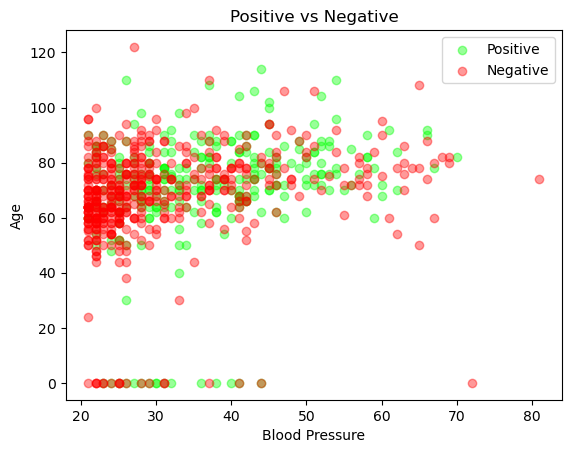

In [34]:
plt.title("Positive vs Negative")
plt.ylabel("Age")
plt.xlabel("Blood Pressure")
plt.scatter(positive.age_years, positive.diastolic_bp_mmHg, color = "lime", label = "Positive", alpha = .4)
plt.scatter(negative.age_years, negative.diastolic_bp_mmHg, color = "red", label = "Negative", alpha = .4)
plt.legend()
plt.show()

#### Removing the rows containing 'age' equal 0

In [35]:
data = data[data['age_years'] != 0]

### Prepare the data for training and testing

In [36]:
x = data.drop(["class"], axis = 1)
y = data['class'].values

In [37]:
from sklearn.model_selection import train_test_split

In [38]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = .25, random_state = 1)

In [39]:
from sklearn.naive_bayes import GaussianNB

In [40]:
NB = GaussianNB()
NB.fit(X_train, y_train)

GaussianNB()

#### Checking the accuracy

In [42]:
i = NB.score(X_test, y_test)
print("The Accuracy of the model: {}".format(i))

The Accuracy of the model: 0.7916666666666666
